In [25]:
import pandas as pd
coords = pd.read_csv("data/data@1.csv")
coords.columns = coords.columns.str.strip()
coords.head()

,x,y,t
0,-1.315625,-2.097147,0.000019
1,-1.314185,-2.095647,0.101519
2,-1.301677,-2.081064,0.203277
3,-1.290842,-2.067686,0.305031
4,-1.279409,-2.053824,0.406551


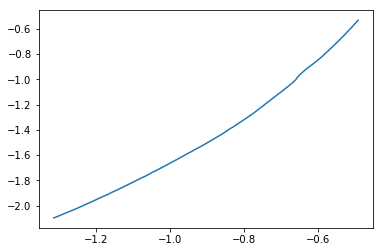

In [26]:
import matplotlib.pyplot as plt
x, y = coords['x'], coords['y']
plt.plot(x, y)

0.17740940054967433

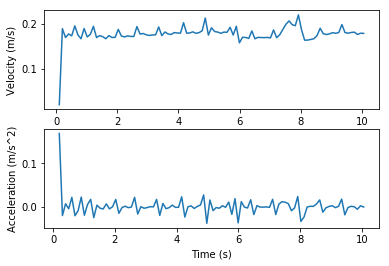

In [28]:
import numpy as np
dist = np.hypot(y.diff(), x.diff())
dt = coords['t'].diff()
v = dist / dt
a = dist.diff() / dt

# Plot velocity
plt.subplot(2,1,1)
plt.plot(t, v)
plt.ylabel('Velocity (m/s)')
plt.xlabel('Time (s)')

# Plot acceleration
plt.subplot(2,1,2)
plt.plot(t, a)
plt.ylabel('Acceleration (m/s^2)')
plt.xlabel('Time (s)')

v.mean()